In [ ]:
import pandas as pd
import numpy as npa
import pandas as pd
import os # use commandline  
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
ecoli = pd.read_csv(io.BytesIO(uploaded['ecoli.csv']))
ecoli.tail()

Saving ecoli.csv to ecoli (5).csv


,mcg,gvh,lip,chg,aac,alm1,alm2
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37
335,0.74,0.74,0.48,0.5,0.31,0.53,0.52


Text(0, 0.5, 'acc')

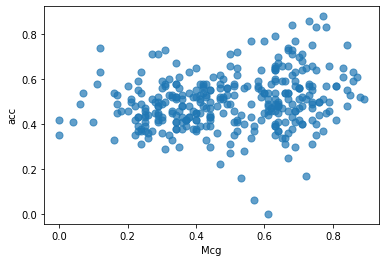

In [ ]:
points = ecoli.iloc[:,:].values
x = points[:, 0]
y = points[:, 4]
plt.scatter(x, y, s=50, alpha=0.7) #s = ขนาดของจุด, alpha =ระดับความคมชัดของจุด
plt.xlabel('Mcg')
plt.ylabel('acc')

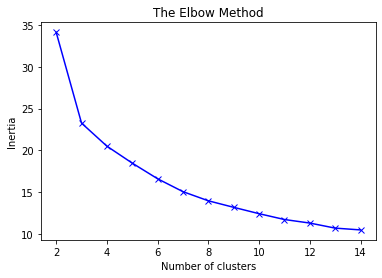

In [ ]:

from sklearn.cluster import KMeans
inertia = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i,  max_iter = 300, random_state = 0)
    kmeans.fit(points)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia,'bx-') # bx- สัญลักษณ์ของกราฟ ในแต่ละคลัสเตอร์
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7,random_state=0)
kmeans.fit(points)
ecoli['Cluster'] = kmeans.labels_
ecoli

,mcg,gvh,lip,chg,aac,alm1,alm2,Cluster
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,2
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,2
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,3
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,2
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,3
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,3
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,3
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,3


In [ ]:
kmeans.labels_

array([2, 2, 0, 3, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 5, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 3, 0, 3, 3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1,
       4, 4, 4, 1, 4, 4, 6, 0, 4, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 3, 0, 0, 0, 0, 3, 4, 4,
       3, 4, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 0, 4, 5, 5, 5, 3, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,

In [ ]:
centers = kmeans.cluster_centers_ 
centers

array([[0.37447368, 0.43486842, 0.48      , 0.5       , 0.44      ,
        0.40868421, 0.45907895],
       [0.37634146, 0.48682927, 0.48      , 0.5       , 0.55414634,
        0.7702439 , 0.77560976],
       [0.325     , 0.38152778, 0.48      , 0.5       , 0.46152778,
        0.23833333, 0.33069444],
       [0.6637037 , 0.69907407, 0.48      , 0.5       , 0.41777778,
        0.46907407, 0.35111111],
       [0.71064516, 0.48387097, 0.48      , 0.5       , 0.5683871 ,
        0.76225806, 0.76870968],
       [0.67619048, 0.68571429, 0.48      , 0.5       , 0.73      ,
        0.45190476, 0.30857143],
       [0.663     , 0.537     , 1.        , 0.55      , 0.549     ,
        0.618     , 0.431     ]])

In [ ]:
kmeans.inertia_

15.042600534681515

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(ecoli)
pca_2d = pca.transform(ecoli)
newdf = pd.DataFrame(pca_2d);
newdf['Cluster'] = kmeans.labels_
newdf

,0,1,Cluster
0,-0.277605,-0.264381,2
1,-0.303098,-0.192014,2
2,-2.254847,-0.008608,0
3,0.738711,-0.148703,3
4,-0.297092,-0.297762,2
...,...,...,...
331,0.759662,-0.015855,3
332,0.745808,-0.233100,3
333,0.739625,-0.183032,3
334,0.738863,-0.174515,3


In [ ]:
ecoli.to_csv('ecoli.csv',index=False)

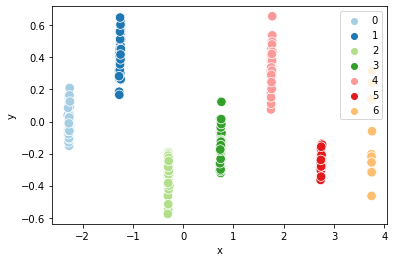

In [ ]:
sns.scatterplot(x=newdf[0], y=newdf[1], hue="Cluster", data=newdf, palette='Paired', s=90, alpha = 1.0,cmap = 'viridis');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

UNSEENDATA


In [ ]:
X=[
   [0.98,0.43,0.48,0.8,0.47,0.69,0.32],
   ] 
C_clustered=kmeans.predict(X)
print(C_clustered)

[3]


ข้อสอง

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['test_retail2.csv']))
df

Saving test_retail2.csv to test_retail2 (1).csv


,"green tea,strawberries,gluten free bar"
0,"frozen vegetables,ground beef,mineral water,sa..."
1,"grated cheese,tomatoes,mineral water,meatballs"
2,"shrimp,chocolate,water spray"
3,turkey
4,"turkey,eggs"
...,...
78,"grated cheese,mineral water,cake,chocolate bread"
79,"tomatoes,almonds,cake,champagne,low fat yogurt"
80,"herb & pepper,shrimp,frozen vegetables,milk,bu..."
81,"herb & pepper,shrimp,whole wheat pasta,whole w..."


In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,almonds,barbecue sauce,blueberries,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,...,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole wheat pasta,whole wheat rice,yams,yogurt cake
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
80,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
freq_items = apriori(df,min_support=0.07,use_colnames = True)
freq_items

,support,itemsets
0,0.096386,(cake)
1,0.156627,(chocolate)
2,0.132530,(cookies)
3,0.216867,(eggs)
4,0.084337,(escalope)
5,0.132530,(french fries)
6,0.084337,(frozen vegetables)
7,0.120482,(ground beef)
8,0.072289,(herb & pepper)
9,0.120482,(low fat yogurt)


In [ ]:
from mlxtend.frequent_patterns import association_rules
df_res = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milk),(mineral water),0.120482,0.289157,0.084337,0.70,2.420833,0.049499,2.369478
1,(tomatoes),(mineral water),0.096386,0.289157,0.072289,0.75,2.593750,0.044419,2.843373


In [ ]:
conf_max = df_res['confidence'].max()
conf_max

0.7499999999999999

In [ ]:
conf_min = df_res["confidence"].min()
conf_min

0.7

In [ ]:
df_filt = df_res[ (df_res["confidence"] == conf_min) | (df_res["confidence"] == conf_max) | (df_res["confidence"] == 0.7 )]
df_filt.sort_values("confidence", ascending = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milk),(mineral water),0.120482,0.289157,0.084337,0.70,2.420833,0.049499,2.369478
1,(tomatoes),(mineral water),0.096386,0.289157,0.072289,0.75,2.593750,0.044419,2.843373
